# **Overview of Titanic Survival Classifier**

This code provides a complete workflow for building and evaluating a machine learning model to predict Titanic survival using a dataset of passengers. The key steps are as follows:

1. **Importing Libraries**: Essential libraries for data manipulation (pandas, numpy), visualization (matplotlib, seaborn), machine learning (scikit-learn), and accessing Google Drive are imported.

2. **Mounting Google Drive**: Google Drive is mounted to access the dataset stored in it.

3. **Loading the Dataset**: The Titanic dataset is loaded from a CSV file located in Google Drive.

4. **Initial Data Inspection**: The last few rows of the dataset are displayed to understand its structure and content, and the column names are checked.

5. **Visualizing Missing Data**: A heatmap is created to visualize missing data, and the number of missing values in each column is displayed.

6. **Exploratory Data Analysis (EDA)**:
   - **Count Plots**: Count plots of survival based on gender, passenger class, and other features are created.
   - **Histograms**: Histograms for age and fare distributions are plotted.
   - **Box Plot**: A box plot to visualize age distribution across different passenger classes is created.

7. **Preprocessing the Data**:
   - **Imputing Missing Values**: Missing ages are imputed based on passenger class, and missing 'Embarked' values are filled with the most common value.
   - **Dropping Columns**: The 'Cabin' column is dropped due to many missing values, and any remaining missing values are dropped.

8. **Converting Categorical Features**: Categorical features ('Sex' and 'Embarked') are converted to numerical format using dummy variables, and irrelevant columns ('Name', 'Ticket') are dropped.

9. **Splitting the Data**: The dataset is split into features (X) and labels (y), and further into training and testing sets (90% training, 10% testing).

10. **Training the Model**: A Decision Tree classifier is trained on the training data.

11. **Making Predictions**: The trained model makes predictions on the test data.

12. **Evaluating the Model**:
    - **Confusion Matrix**: The confusion matrix is displayed to show true positives, true negatives, false positives, and false negatives.
    - **Accuracy Score**: The accuracy of the model is calculated and printed.
    - **Classification Report**: A detailed classification report (including precision, recall, and F1-score) is generated and printed.

13. **Confusion Matrix Visualization**: A function is defined and called to plot the confusion matrix, visualizing the model's performance.

14. **Survival Prediction Function**: A function is defined to predict whether a given passenger would survive based on their features. The function transforms the input data and predicts its label using the trained model.

15. **Example Prediction**: The script provides an example of how to use the prediction function with new data and prints the result.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Datasets/titanic_classification.csv')

In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: >

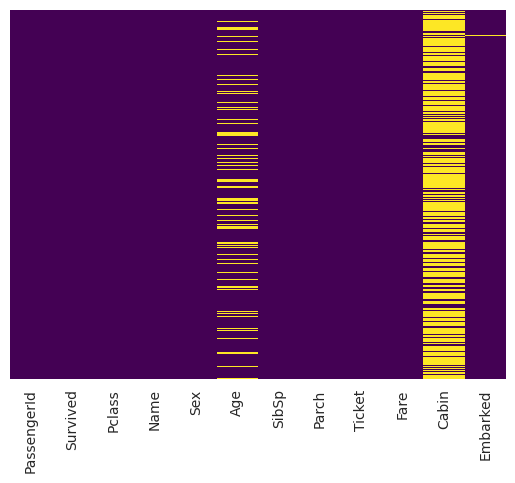

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<ipython-input-61-05742e5567b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=train,palette='RdBu_r')


<Axes: xlabel='Survived', ylabel='count'>

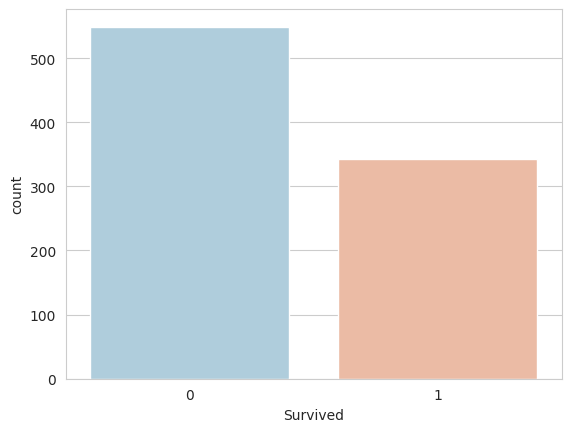

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

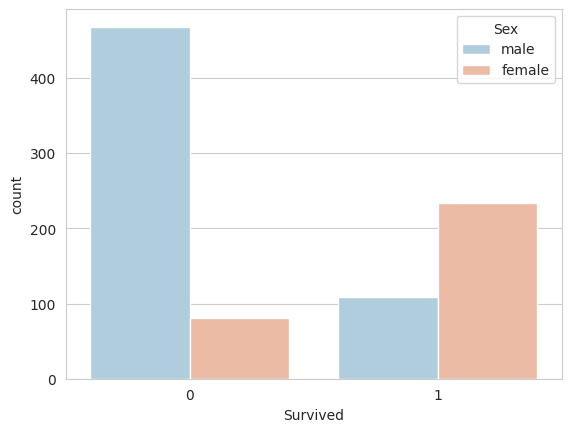

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

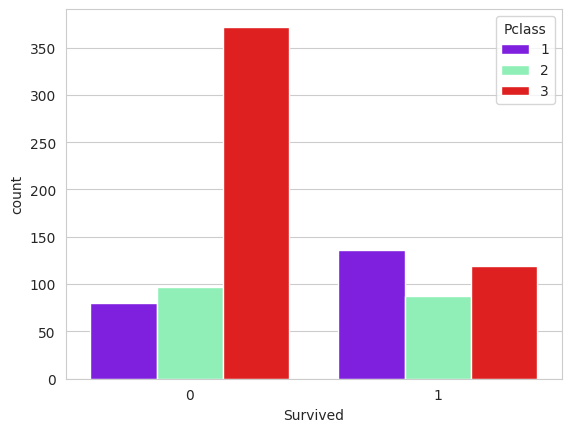

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<Axes: >

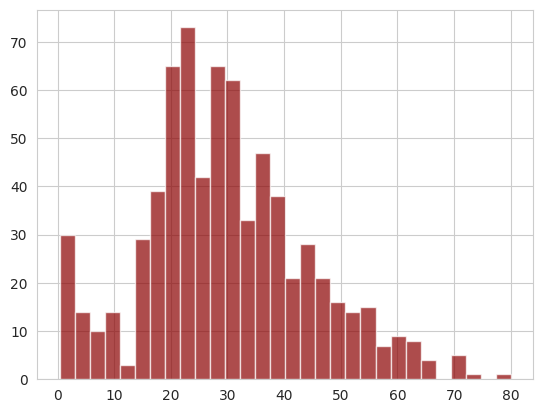

In [ ]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

<Axes: xlabel='SibSp', ylabel='count'>

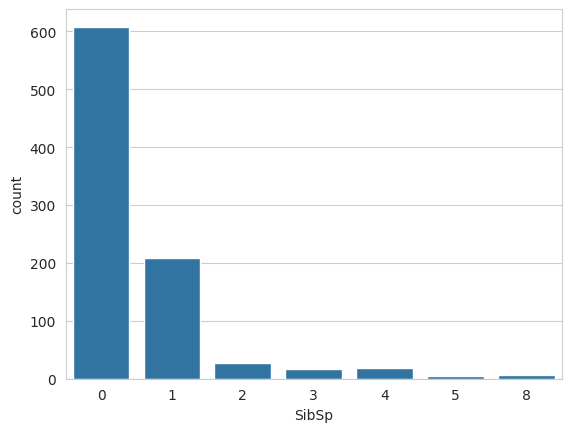

In [ ]:
sns.countplot(x='SibSp',data=train)

<Axes: xlabel='Parch', ylabel='count'>

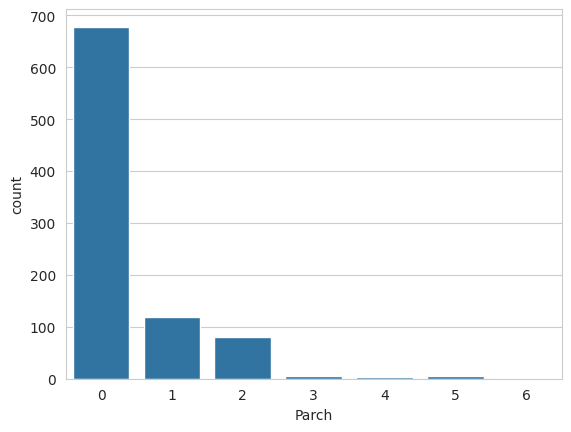

In [ ]:
sns.countplot(x='Parch',data=train)

<Axes: >

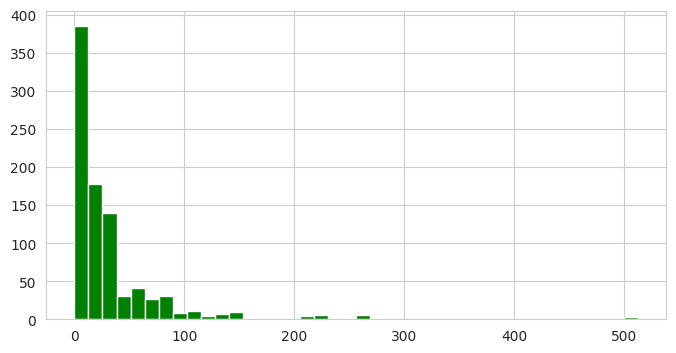

In [ ]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

<ipython-input-68-551bc5ec5847>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

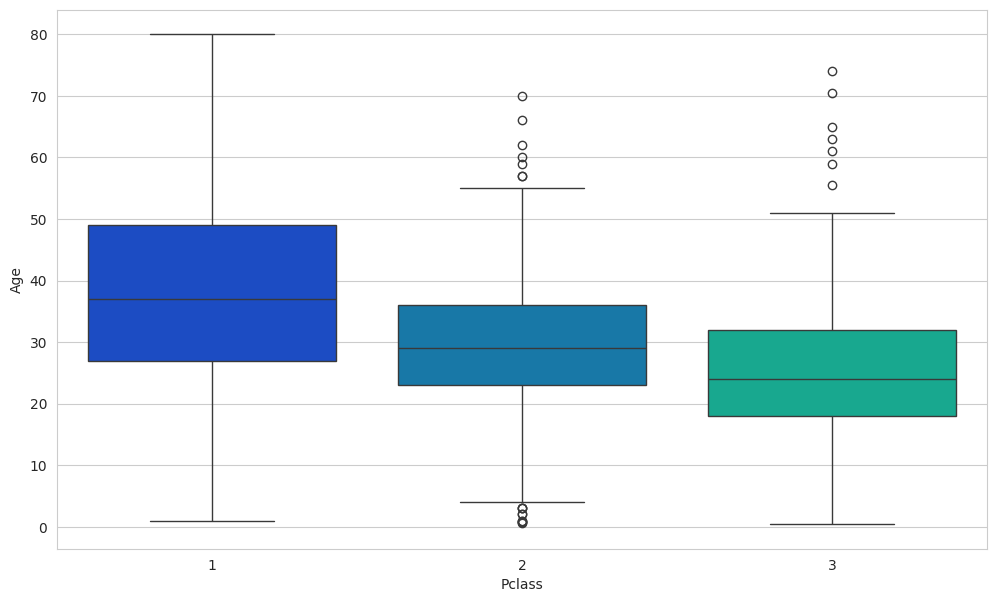

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
train['Embarked'] = train['Embarked'].fillna('S')

<Axes: >

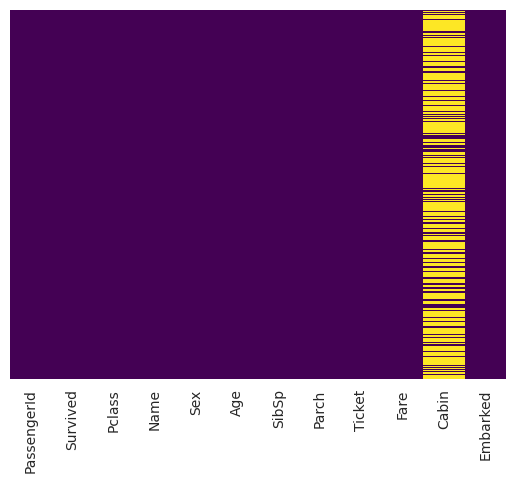

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.drop('Cabin',axis=1,inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
train.dropna(inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
train = pd.concat([train,sex,embark],axis=1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'],axis=1),
                                                    train['Survived'], test_size=0.10,
                                                    random_state=101)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_pred = dt_model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,dt_pred))

[[44  7]
 [15 24]]


In [ ]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, dt_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


In [ ]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        51
           1       0.77      0.62      0.69        39

    accuracy                           0.76        90
   macro avg       0.76      0.74      0.74        90
weighted avg       0.76      0.76      0.75        90



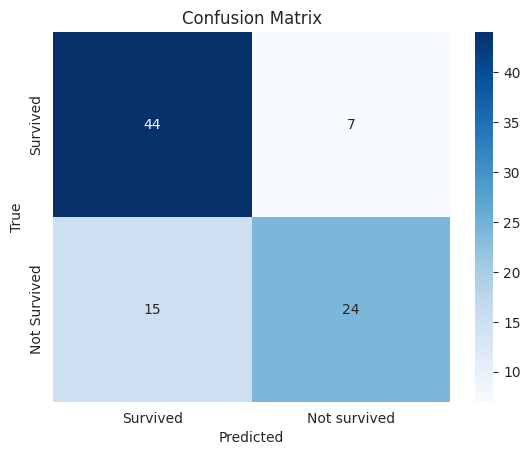

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Survived', 'Not survived'], yticklabels=['Survived', 'Not Survived'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, dt_pred)

In [ ]:
import numpy as np
def predict_survival(model, new_data):
  #Predicts whether a person will survive or not based on the provided model and new data
  # Convert new_data to a NumPy array
  new_data_array = np.asarray(new_data)
  # Reshape the array to match the model input format
  new_data_reshaped = new_data_array.reshape(1, -1)
  # Make a prediction
  prediction = model.predict(new_data_reshaped)[0]
  # Return the corresponding survival status
  if prediction == 0:
    return "Not Survived"
  else:
    return "Survived"
# Example usage
new_data = [[1,		3,	22.0,	1,	0,	7.2500,	True,	False,	True]]
survival_prediction = predict_survival(rf, new_data)
print(f"Prediction: {survival_prediction}")

Prediction: Not Survived


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
